# EDA: Is there Bias in Pollsters in Elections Polls?

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

Importing CSV file

In [171]:
election = pd.read_csv("https://raw.githubusercontent.com/ronwho/2020-Data-Files/master/2012-general-election-romney-vs-obama.csv")
display(election.head())

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


Converting dates to datetime objects.
I am first extracting a specific time period of polls that happened on November 2012

In [116]:
election['Start Date'] = pd.to_datetime(election['Start Date'])
election['End Date'] = pd.to_datetime(election['End Date'])
election['Entry Date/Time (ET)'] = pd.to_datetime(election['Entry Date/Time (ET)'])

novemberPolls = election.copy()
novemberPolls = novemberPolls[novemberPolls['Start Date'].dt.month == 11]
novemberPolls = novemberPolls[novemberPolls['Start Date'].dt.year == 2012]
display(novemberPolls.head())
#This is the number of polls that happened on November of 2012
M = novemberPolls.index.size
M

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 08:40:26+00:00,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26 15:31:23+00:00,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 09:22:02+00:00,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06 08:51:48+00:00,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 08:47:50+00:00,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


19

In [117]:
#median number of observations
N = novemberPolls['Number of Observations'].median()
N

1200.0

Now I will simulate the number votes from a single poll that would occur if I set the probability in the binomial distribution to be 53%

In [164]:
#simulating number of votes for Obama using binomial distribution
#N = number of votes = 1200
#p = probability of each vote
p=0.53
s = np.random.binomial(N,p,1)
"Simulated votes for Obama out of 1200 votes is %i" %s.sum()

'Simulated votes for Obama out of 1200 votes is 673'

Now I want to repeat the simulation 1000 times and plot the distribution of how many votes will occur each time

Text(0, 0.5, 'Frequency')

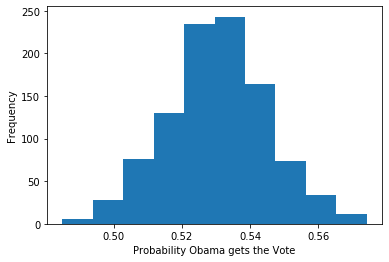

In [170]:
#Simulating this poll 1000 times
sim = np.random.binomial(N,p,1000)/N
plt.hist(sim)
plt.xlabel("Probability Obama gets the Vote")
plt.ylabel("Frequency")
#from the histogram, the distribution looks normal

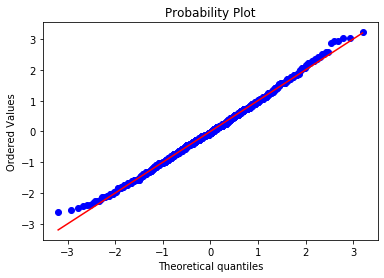

In [158]:
#checking with qqplot if its a normal distribution
import scipy.stats as stats
stats.probplot((sim-np.mean(sim))/np.std(sim),plot=plt)
plt.show()

The distribtuion of the result seems to be normal

The standard deviation of the distribution is the standard error of it

In [133]:
se1 = np.std(sim)*100
"Stardard error of the simulated percentage from the poll is %f"%(se1)

'Stardard error of the simulated percentage from the poll is 1.426839'

Now I would like to run the simulation to the number of polls that happened in novemeber 2012. We would also like to calculate the mean of the 19 polls each time. I will repeat the simulation 1000 times

In [126]:
#Running the simulation M times
np.random.binomial(N,p,M)

array([643, 587, 635, 669, 654, 651, 638, 631, 622, 642, 621, 630, 614,
       669, 641, 635, 634, 650, 650])

In [137]:
#Calcualting the median each time for 1000 times
sim2 = [np.median(np.random.binomial(N,p,M)/N) for _ in range(1000)]
sim2[:10]

[0.5266666666666666,
 0.5241666666666667,
 0.53,
 0.5283333333333333,
 0.53,
 0.5391666666666667,
 0.5241666666666667,
 0.5241666666666667,
 0.525,
 0.5308333333333334]

This is the histogram distribution of the percentages Obama will get voted

Text(0, 0.5, 'Frequency')

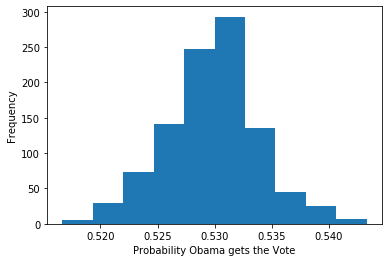

In [169]:
plt.hist(sim2)
plt.xlabel("Probability Obama gets the Vote")
plt.ylabel("Frequency")

Standard error of the this simulation

In [141]:
#standard error
se2 = np.std(sim2)
se2

0.00417368400749799

I observe that the standard error of the average of polls is smaller than the standard deviation of a single poll by approximate 3 times

In [140]:
ratio = se1/se2
ratio

341.8656866235498

Now I would like to find the standard deviation of each simulation of 19 polls instead of the mean for 1000 times

In [145]:
#calculating standard deviation of each simulation for 1000 times
pollstd = [np.std(np.random.binomial(N,p,M)) for _ in range(1000)]

Text(0, 0.5, 'Frequency')

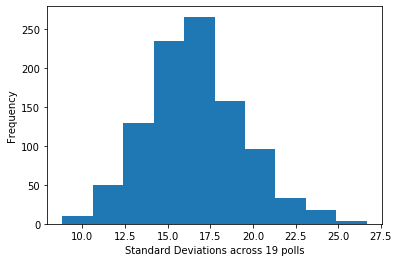

In [168]:
plt.hist(pollstd)
plt.xlabel("Standard Deviations across 19 polls")
plt.ylabel("Frequency")
#the distribution appears to be normal

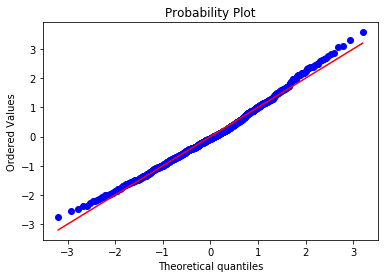

In [157]:
#using QQplot to check
stats.probplot((pollstd - np.mean(pollstd))/np.std(pollstd),plot = plt)
plt.show()

Now I want to check the real data's standard deviation 

In [160]:
#real non simulated data's standard deviation
np.std(election['Obama']/100)

0.024199901720378662

If the expected polls were not biased then the standard deviation of the real non simulated data should be smaller than the stardard deviation of the data if it weren't biased

# Conclusion

The polls were not biased because the standard deviation real data's standard deviation is smaller than the standard deviation we simulated assuming that the data is not biased